# REPORT 2- DATA SCIENCE RESEARCH METHODS BY NWANYA IMMACULATER (260794)

# OVERVIEW

This report is carried out to analyze the Physical Activity Monitoring Dataset performed by 9 Subjects carrying out 18 Physical activities while wearing 3 Inertial Measurement Units (IMU) and a heart rate monitor.

# Table of Content
### 1. Introduction
### 2. Data Cleaning
### 3. Data Splitting
### 4. Exploratory Data Analysis
### 4.1. Data Distribution
### 4.2. Subject Distribution
### 4.3 Activity Distribution
### 5. Hypothesis Testing
### 6. Machine Learning Modelling
### 6.1 Model 1- Logistic Regression
### 6.2 Model 2- K-Means Clustering 
### 6.3 Model 3- Random Forest Classifier
###  7. Conclusion
### 8. References

# 1. Introduction

The aim of this report is to analyze the Physical Activity Monitoring Dataset which contains 18 physical activities performed by 9 subjects which includes 8 males and 1 female putting on 3 Inertial Measurement Units and 1 Heart rate monitor.  

The sampling frequency was at 100Hz and the position of the sensors were placed accordingly:
  - 1 IMU on the chest
  - 1 IMU over the wrist on the dominant arm
  - 1 IMU on the dominant side's ankle

The data set provided can be used to carryout a lot of reasearches such as activity recognition and intensity estimation and algorithms can also be applied for segmentaion, data processing, feature extraction etc. For this report, the dataset was used for Exploratory Data Analysis and classification of activities and further training for different machine learning models was tested to classify the activities. 

This report is divided into three main parts:
   1. Data Cleaning and Exploratory Data Analysis (EDA)
   2. Hypothesis Testing
   3. Machine Learning Modelling.
 
At the end of this analysis, the model should be able to predict the type of activity being carried out by an individual depending on various features of the dataset.


### Importing Libraries

In [1]:
# First we import the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.simplefilter('ignore')

### Loading the Dataset

The dataset was in 9 files for each of the subjects with a ".dat" format that was read using pandas library. However, they were no headers present sousing the data description file, the column names were created and stored in a python list as shown below. The files were read individually to the header and appended into a single dataframe. Also, a function was defined to take the address of a folder containing a data file and read the data. This function returns the dataframe to the main function  that was stored in the "df" variable as shown below.


In [3]:
# Creating a column name for the dataset
column_header = ['time_stamp', 'activity_id', 'heart_rate', 'hand_temperature', 'hand_3D_acceleration_16_x',  'hand_3D_acceleration_16_y',
         'hand_3D_acceleration_16_z', 'hand_3D_acceleration_6_x', 'hand_3D_acceleration_6_y', 'hand_3D_acceleration_6_z', 'hand_3D_gyroscope_x',
         'hand_3D_gyroscope_y',  'hand_3D_gyroscope_z', 'hand_3D_magnetometer_x', 'hand_3D_magnetometer_y', 'hand_3D_magnetometer_z',
         'hand_4D_orientation_x', 'hand_4D_orientation_y', 'hand_4D_orientation_z', 'hand_4D_orientation_w', 'chest_temperature', 'chest_3D_acceleration_16_x',
         'chest_3D_acceleration_16_y', 'chest_3D_acceleration_16_z', 'chest_3D_acceleration_6_x', 'chest_3D_acceleration_6_y',  'chest_3D_acceleration_6_z',
         'chest_3D_gyroscope_x', 'chest_3D_gyroscope_y', 'chest_3D_gyroscope_z', 'chest_3D_magnetometer_x', 'chest_3D_magnetometer_y',
         'chest_3D_magnetometer_z', 'chest_4D_orientation_x', 'chest_4D_orientation_y', 'chest_4D_orientation_z', 'chest_4D_orientation_w',
         'ankle_temperature', 'ankle_3D_acceleration_16_x', 'ankle_3D_acceleration_16_y', 'ankle_3D_acceleration_16_z', 'ankle_3D_acceleration_6_x',
         'ankle_3D_acceleration_6_y', 'ankle_3D_acceleration_6_z', 'ankle_3D_gyroscope_x', 'ankle_3D_gyroscope_y', 'ankle_3D_gyroscope_z',
         'ankle_3D_magnetometer_x', 'ankle_3D_magnetometer_y', 'ankle_3D_magnetometer_z', 'ankle_4D_orientation_x', 'ankle_4D_orientation_y',
         'ankle_4D_orientation_z', 'ankle_4D_orientation_w']

In [4]:
# Function to load all subjects data
def load_dataset(root):
    data = pd.DataFrame()
    
    for i in range(101,110):
        path = root + str(i) +'.dat'
        df = pd.read_table(path, header=None, sep='\s+')
        df.columns = column_header 
        df['id'] = i
        data = data.append(df, ignore_index=True)
    data.reset_index(drop=True, inplace=True)
    return data

df = load_dataset('Dataset/Protocol/subject')
     

In [5]:
# Checking to see the first five rows in the dataset
df.head()

time_stamp  activity_id  heart_rate  hand_temperature  \
0        8.38            0       104.0              30.0   
1        8.39            0         NaN              30.0   
2        8.40            0         NaN              30.0   
3        8.41            0         NaN              30.0   
4        8.42            0         NaN              30.0   

   hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
0                    2.37223                    8.60074   
1                    2.18837                    8.56560   
2                    2.37357                    8.60107   
3                    2.07473                    8.52853   
4                    2.22936                    8.83122   

   hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
0                    3.51048                   2.43954   
1                    3.66179                   2.39494   
2                    3.54898                   2.30514   
3                    3.66021                   2.33528   
4                    3.70000                   2.23055   

   hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  ...  \
0                   8.76165                   3.35465  ...   
1                   8.55081                   3.64207  ...   
2                   8.53644                   3.73280  ...   
3                   8.53622                   3.73277  ...   
4                   8.59741                   3.76295  ...   

   ankle_3D_gyroscope_y  ankle_3D_gyroscope_z  ankle_3D_magnetometer_x  \
0              0.009250             -0.017580                 -61.1888   
1             -0.004638              0.000368                 -59.8479   
2              0.000148              0.022495                 -60.7361   
3             -0.020301              0.011275                 -60.4091   
4             -0.014303             -0.002823                 -61.5199   

   ankle_3D_magnetometer_y  ankle_3D_magnetometer_z  ankle_4D_orientation_x  \
0                 -38.9599                 -58.1438                     1.0   
1                 -38.8919                 -58.5253                     1.0   
2                 -39.4138                 -58.3999                     1.0   
3                 -38.7635                 -58.3956                     1.0   
4                 -39.3879                 -58.2694                     1.0   

   ankle_4D_orientation_y  ankle_4D_orientation_z  ankle_4D_orientation_w   id  
0                     0.0                     0.0                     0.0  101  
1                     0.0                     0.0                     0.0  101  
2                     0.0                     0.0                     0.0  101  
3                     0.0                     0.0                     0.0  101  
4                     0.0                     0.0                     0.0  101  

[5 rows x 55 columns]

In [6]:
# Checking to see the last 5 rows in the dataset
df.tail()

time_stamp  activity_id  heart_rate  hand_temperature  \
2872528      100.19            0         NaN           25.1875   
2872529      100.20            0         NaN           25.1875   
2872530      100.21            0         NaN           25.1875   
2872531      100.22            0         NaN           25.1875   
2872532      100.23            0       161.0           25.1875   

         hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
2872528                   -4.71493                   10.22250   
2872529                   -4.95932                   10.37130   
2872530                   -4.93997                    9.83615   
2872531                   -4.64941                    9.11129   
2872532                   -4.09726                    8.15642   

         hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
2872528                    4.66893                  -5.04654   
2872529                    4.12594                  -4.96890   
2872530                    3.70468                  -5.04613   
2872531                    3.51904                  -5.06854   
2872532                    3.29961                  -4.73244   

         hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  ...  \
2872528                   9.94944                   4.50736  ...   
2872529                  10.29620                   4.43102  ...   
2872530                  10.35690                   4.14405  ...   
2872531                   9.75268                   3.87359  ...   
2872532                   8.82870                   3.54305  ...   

         ankle_3D_gyroscope_y  ankle_3D_gyroscope_z  ankle_3D_magnetometer_x  \
2872528             -0.062676             -0.127084                 -46.5153   
2872529             -0.027006             -0.089808                 -45.7474   
2872530             -0.038024             -0.064709                 -46.3997   
2872531             -0.025796             -0.064357                 -46.5282   
2872532              0.011866             -0.042858                 -46.2704   

         ankle_3D_magnetometer_y  ankle_3D_magnetometer_z  \
2872528                  3.58240                -0.035995   
2872529                  3.54453                 0.108583   
2872530                  4.22078                 0.105504   
2872531                  4.48593                 0.530240   
2872532                  4.21475                 0.247798   

         ankle_4D_orientation_x  ankle_4D_orientation_y  \
2872528                0.598531                0.033615   
2872529                0.598428                0.033012   
2872530                0.598233                0.033172   
2872531                0.598116                0.033427   
2872532                0.598119                0.033685   

         ankle_4D_orientation_z  ankle_4D_orientation_w   id  
2872528                0.799791               -0.031075  109  
2872529                0.799933               -0.030018  109  
2872530                0.800095               -0.029416  109  
2872531                0.800180               -0.029208  109  
2872532                0.800188               -0.028602  109  

[5 rows x 55 columns]

# 2. Data Cleaning

From the dataset, it was noticed that there were some  missing data. This could have occured as a result of two major reasons;
   - The data dropping as a result of the wireless sensors used. Although this occured very rarely as the three Inertial Measurement Units (IMUs) had a real sampling frequency of 99.63Hz for the hand,99.65Hz for the ankle and 99.89Hz for the Chest IMU placement.
   - Other problems associated with the hardware setup such as loss of connection to the dongles or even a system crash which could have resulted in the partial or complete loss of some activities for the subjects.

In total, over 10 hours of the data was collected in which almost 8 hours  were labeled as 1 of the 18 activities performed during the data collection.

Looking at the dataset, I observed that there were Null values present in different features which required to be cleaned to improve the accuracy of the analysis. In order to perform this, I carried out Data Cleaning which can be defined as a method used to remove null values, dirty data, messy data, outliers and other  factors which could affect the quality of the analysis. This is a very important step as it directly impacts the success rate and quality of the analysis. While it reduces the errors contained in the data set, it improves the accuracy and learning rate of the Machine learning model by inputting clean data which in turn gives a good data prediction. 

I defined a function to check for the number of unique values, missing values, percentage of missing values and the data type  for each column as shown below. The result showed that there were 52 columns with null values. Also, the Heart Rate column had the highest percentage of missing values with about 90 percent of its data missing while the other features had less than 5 percent missing values. In order to fix this issue, the Missing values would either be dropped or filled. For this analysis, I used the interpolation method to fill the data as it was the best option considering that different activities should have different heart rates not similar heart rates (For example the heart  rate reading for a subject running would be higher than when the person is lying down).

Alos, the records where the activity_id was equal to zero (0) was dropped because it is not a valid activity and it was probably present in the data due to a fault/error made by the sensors.


In [7]:
# Defining a function that checks for the number of unique values,missing values,percentage of missing and unique values and data type against each column.
def statistics(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    stats_df.set_index('Feature', drop=True, inplace=True)
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df

statistics(df).T
     

Feature                      heart_rate hand_3D_gyroscope_z hand_temperature  \
Unique_values                       146             1875844              138   
Missing values                  2610265               13141            13141   
Percentage of Missing Values    90.8698            0.457471         0.457471   
Data Type                       float64             float64          float64   

Feature                      hand_4D_orientation_z hand_4D_orientation_y  \
Unique_values                              1247500               1347718   
Missing values                               13141                 13141   
Percentage of Missing Values              0.457471              0.457471   
Data Type                                  float64               float64   

Feature                      hand_4D_orientation_x hand_3D_magnetometer_z  \
Unique_values                              1002405                1130762   
Missing values                               13141                  13141   
Percentage of Missing Values              0.457471               0.457471   
Data Type                                  float64                float64   

Feature                      hand_3D_magnetometer_y hand_3D_magnetometer_x  \
Unique_values                               1220419                1156337   
Missing values                                13141                  13141   
Percentage of Missing Values               0.457471               0.457471   
Data Type                                   float64                float64   

Feature                      hand_4D_orientation_w  ...  \
Unique_values                              1400053  ...   
Missing values                               13141  ...   
Percentage of Missing Values              0.457471  ...   
Data Type                                  float64  ...   

Feature                      chest_3D_acceleration_6_y chest_3D_gyroscope_x  \
Unique_values                                   763044              1827061   
Missing values                                    3563                 3563   
Percentage of Missing Values                  0.124037             0.124037   
Data Type                                      float64              float64   

Feature                      chest_4D_orientation_z chest_3D_gyroscope_z  \
Unique_values                               1449428              1802080   
Missing values                                 3563                 3563   
Percentage of Missing Values               0.124037             0.124037   
Data Type                                   float64              float64   

Feature                      chest_3D_magnetometer_x chest_3D_magnetometer_y  \
Unique_values                                1410128                  626338   
Missing values                                  3563                    3563   
Percentage of Missing Values                0.124037                0.124037   
Data Type                                    float64                 float64   

Feature                      chest_3D_magnetometer_z chest_4D_orientation_x  \
Unique_values                                1270492                 849688   
Missing values                                  3563                   3563   
Percentage of Missing Values                0.124037               0.124037   
Data Type                                    float64                float64   

Feature                      chest_4D_orientation_y chest_3D_gyroscope_y  
Unique_values                                951475              1918959  
Missing values                                 3563                 3563  
Percentage of Missing Values               0.124037             0.124037  
Data Type                                   float64              float64  

[4 rows x 52 columns]

In [8]:
# To drop the rows with missing values in the heart rate column 
df0 = df.dropna(subset = ['heart_rate'])
df0.head()

time_stamp  activity_id  heart_rate  hand_temperature  \
0         8.38            0       104.0              30.0   
10        8.48            0       104.0              30.0   
21        8.59            0       104.0              30.0   
32        8.70            0       104.0              30.0   
43        8.81            0       104.0              30.0   

    hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
0                     2.37223                    8.60074   
10                    2.29745                    8.90450   
21                    2.40867                    9.16819   
32                    2.18114                    8.86676   
43                    2.40681                    8.71326   

    hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
0                     3.51048                   2.43954   
10                    3.46984                   2.39736   
21                    3.35516                   2.48704   
32                    3.39125                   2.34987   
43                    3.39515                   2.39710   

    hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  ...  \
0                    8.76165                   3.35465  ...   
10                   8.94335                   3.53551  ...   
21                   9.03315                   3.35401  ...   
32                   8.74730                   3.46048  ...   
43                   8.86788                   3.58097  ...   

    ankle_3D_gyroscope_y  ankle_3D_gyroscope_z  ankle_3D_magnetometer_x  \
0               0.009250             -0.017580                 -61.1888   
10              0.002283              0.020352                 -61.5302   
21              0.005791              0.021763                 -61.0729   
32              0.010042             -0.004228                 -61.4205   
43             -0.013822              0.008244                 -60.8480   

    ankle_3D_magnetometer_y  ankle_3D_magnetometer_z  ankle_4D_orientation_x  \
0                  -38.9599                 -58.1438                     1.0   
10                 -38.7240                 -58.3860                     1.0   
21                 -39.5091                 -58.6457                     1.0   
32                 -39.0475                 -59.2568                     1.0   
43                 -38.8713                 -57.4029                     1.0   

    ankle_4D_orientation_y  ankle_4D_orientation_z  ankle_4D_orientation_w  \
0                      0.0                     0.0                     0.0   
10                     0.0                     0.0                     0.0   
21                     0.0                     0.0                     0.0   
32                     0.0                     0.0                     0.0   
43                     0.0                     0.0                     0.0   

     id  
0   101  
10  101  
21  101  
32  101  
43  101  

[5 rows x 55 columns]

In [10]:
# Checking to see the number of rows and columns after dropping
df0.shape

(262268, 55)

In [11]:
# Function to clean the dataset
def cleaned_data(dataset):
    # The Acitvity_id = 0 and it is not an valid activity so it should be dropped
    dataset = dataset.drop(dataset[dataset['activity_id']==0].index)
    # remove non-numeric data cells
    dataset = dataset.apply(pd.to_numeric, errors = 'coerce')
    # removing NaN values using iterpolation
    dataset = dataset.interpolate()
    return dataset

In [12]:
# To check for the cleaned  data
df1 = cleaned_data(df0)
df1.reset_index(drop=True,inplace=True)
display(df1.head())


time_stamp  activity_id  heart_rate  hand_temperature  \
0       37.70            1       100.0            30.375   
1       37.81            1       100.0            30.375   
2       37.92            1       100.0            30.375   
3       38.03            1       100.0            30.375   
4       38.14            1       101.0            30.375   

   hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
0                    2.30106                    7.25857   
1                    2.24615                    7.48180   
2                    2.30000                    7.10681   
3                    2.49455                    7.52335   
4                    2.71654                    8.30596   

   hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
0                    6.09259                   2.20720   
1                    5.55219                   2.25130   
2                    6.09309                   2.34613   
3                    6.17157                   2.59106   
4                    4.78671                   2.59596   

   hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  ...  \
0                   7.24042                   5.95555  ...   
1                   7.40595                   5.65313  ...   
2                   7.46611                   6.12103  ...   
3                   7.76653                   6.27112  ...   
4                   7.94641                   4.86635  ...   

   ankle_3D_gyroscope_y  ankle_3D_gyroscope_z  ankle_3D_magnetometer_x  \
0             -0.048878             -0.006328                 -60.2040   
1             -0.017912              0.015243                 -60.7820   
2             -0.011798              0.011387                 -61.4531   
3             -0.009233              0.005823                 -62.0065   
4             -0.042562             -0.009289                 -60.4311   

   ankle_3D_magnetometer_y  ankle_3D_magnetometer_z  ankle_4D_orientation_x  \
0                 -37.1225                 -57.8847                     1.0   
1                 -36.2116                 -58.4891                     1.0   
2                 -36.2983                 -58.4845                     1.0   
3                 -36.7217                 -58.3608                     1.0   
4                 -37.5412                 -59.0013                     1.0   

   ankle_4D_orientation_y  ankle_4D_orientation_z  ankle_4D_orientation_w   id  
0                     0.0                     0.0                     0.0  101  
1                     0.0                     0.0                     0.0  101  
2                     0.0                     0.0                     0.0  101  
3                     0.0                     0.0                     0.0  101  
4                     0.0                     0.0                     0.0  101  

[5 rows x 55 columns]

In [14]:
# To check for the number of rows and columns left after cleaning
df1.shape

(177408, 55)

In [15]:
# To check to see if there are any null values
df1.isnull().sum()

time_stamp                    0
activity_id                   0
heart_rate                    0
hand_temperature              0
hand_3D_acceleration_16_x     0
hand_3D_acceleration_16_y     0
hand_3D_acceleration_16_z     0
hand_3D_acceleration_6_x      0
hand_3D_acceleration_6_y      0
hand_3D_acceleration_6_z      0
hand_3D_gyroscope_x           0
hand_3D_gyroscope_y           0
hand_3D_gyroscope_z           0
hand_3D_magnetometer_x        0
hand_3D_magnetometer_y        0
hand_3D_magnetometer_z        0
hand_4D_orientation_x         0
hand_4D_orientation_y         0
hand_4D_orientation_z         0
hand_4D_orientation_w         0
chest_temperature             0
chest_3D_acceleration_16_x    0
chest_3D_acceleration_16_y    0
chest_3D_acceleration_16_z    0
chest_3D_acceleration_6_x     0
chest_3D_acceleration_6_y     0
chest_3D_acceleration_6_z     0
chest_3D_gyroscope_x          0
chest_3D_gyroscope_y          0
chest_3D_gyroscope_z          0
chest_3D_magnetometer_x       0
chest_3D

In [17]:
df1.head()

time_stamp  activity_id  heart_rate  hand_temperature  \
0       37.70            1       100.0            30.375   
1       37.81            1       100.0            30.375   
2       37.92            1       100.0            30.375   
3       38.03            1       100.0            30.375   
4       38.14            1       101.0            30.375   

   hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
0                    2.30106                    7.25857   
1                    2.24615                    7.48180   
2                    2.30000                    7.10681   
3                    2.49455                    7.52335   
4                    2.71654                    8.30596   

   hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
0                    6.09259                   2.20720   
1                    5.55219                   2.25130   
2                    6.09309                   2.34613   
3                    6.17157                   2.59106   
4                    4.78671                   2.59596   

   hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  ...  \
0                   7.24042                   5.95555  ...   
1                   7.40595                   5.65313  ...   
2                   7.46611                   6.12103  ...   
3                   7.76653                   6.27112  ...   
4                   7.94641                   4.86635  ...   

   ankle_3D_gyroscope_y  ankle_3D_gyroscope_z  ankle_3D_magnetometer_x  \
0             -0.048878             -0.006328                 -60.2040   
1             -0.017912              0.015243                 -60.7820   
2             -0.011798              0.011387                 -61.4531   
3             -0.009233              0.005823                 -62.0065   
4             -0.042562             -0.009289                 -60.4311   

   ankle_3D_magnetometer_y  ankle_3D_magnetometer_z  ankle_4D_orientation_x  \
0                 -37.1225                 -57.8847                     1.0   
1                 -36.2116                 -58.4891                     1.0   
2                 -36.2983                 -58.4845                     1.0   
3                 -36.7217                 -58.3608                     1.0   
4                 -37.5412                 -59.0013                     1.0   

   ankle_4D_orientation_y  ankle_4D_orientation_z  ankle_4D_orientation_w   id  
0                     0.0                     0.0                     0.0  101  
1                     0.0                     0.0                     0.0  101  
2                     0.0                     0.0                     0.0  101  
3                     0.0                     0.0                     0.0  101  
4                     0.0                     0.0                     0.0  101  

[5 rows x 55 columns]

## Mapping the activities for each ID

Here, all the activities were taken and kept into a dictionary with the key as the activity_id.The keys in the dictionary is the activity_id and the value is the activity_name and I mapped this dictionary to the activity_id feature in the dataframe and the result was a series of acitivity names that was stored in temp dataframe.

In [18]:
# Mapping each activity to its ID
activity_list = {1: 'lying', 2:'sitting', 3:'standing', 4:'walking', 5:'running', 6:'cycling', 7:'Nordic_walking',
          9:'watching_TV', 10:'computer_work', 11:'car driving', 12:'ascending_stairs', 13:'descending_stairs',
          16:'vacuum_cleaning', 17:'ironing', 18:'folding_laundry', 19:'house_cleaning', 20:'playing_soccer', 24:'rope_jumping'}

df1["activity"] = [activity_list[x] for x in df1['activity_id']]

# 3. Data Splitting

To carryout this analysis, I would be splitting my dataset into two in which 80% would be used to carry out the Exploratory Data Analysis (EDA) and 20% would be used for the Hypothesis Testing.The reason why we split our data is to be able to accurately compare the performance of the analysis result gotten from the data analysis and the hypothesis testing.

Firstly, I created a copy of my dataset to have an original copy before splitting and  carrying out the analysis.


In [19]:
# Creating a copy of the dataset
df2 = df1.copy()

In [20]:
# Splitting the data into two fro EDA and Hypothesis Testing
eda_data=df1.sample(frac=0.8, random_state=1)
hypo_data=df1.drop(eda_data.index)

In [21]:
# Checking the EDA data
eda_data.head()

time_stamp  activity_id  heart_rate  hand_temperature  \
6023        696.55            3        98.0           33.0000   
172492     3179.34            7       117.0           30.6875   
164885     1672.66           12        98.0           34.3750   
21458      3325.73            5       173.0           30.3750   
106772     3424.74            5       161.0           33.8125   

        hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
6023                     3.220410                   9.288790   
172492                   0.664431                  -2.854710   
164885                 -15.613000                  -0.937918   
21458                  -10.538700                   3.428580   
106772                  10.868100                  -0.198022   

        hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
6023                     0.595819                  3.324960   
172492                   2.368920                  0.599561   
164885                  -1.229770                -15.584300   
21458                   -0.668157                -11.024800   
106772                  -1.297450                 12.406600   

        hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  ...  \
6023                    9.281230                  0.558966  ...   
172492                 -2.688870                  2.128260  ...   
164885                 -1.200490                 -0.818201  ...   
21458                   4.777620                 -0.503745  ...   
106772                 -0.391134                 -1.301630  ...   

        ankle_3D_gyroscope_z  ankle_3D_magnetometer_x  \
6023               -0.001915                 -97.5577   
172492              0.759541                 -44.2088   
164885              1.378700                 -49.8123   
21458              -0.157399                 -47.9111   
106772             -2.725030                 -33.8463   

        ankle_3D_magnetometer_y  ankle_3D_magnetometer_z  \
6023                  -26.08770                 42.42800   
172492                 -6.52696                 16.15270   
164885                 46.46540                 -8.46543   
21458                 -41.02020                -12.47620   
106772                 31.46850                 22.10200   

        ankle_4D_orientation_x  ankle_4D_orientation_y  \
6023                  1.000000                0.000000   
172492                0.293139               -0.576703   
164885                0.273075               -0.166968   
21458                 1.000000                0.000000   
106772                0.371826                0.656216   

        ankle_4D_orientation_z  ankle_4D_orientation_w   id          activity  
6023                  0.000000                0.000000  101          standing  
172492                0.536492               -0.541903  108    Nordic_walking  
164885                0.632223               -0.705582  108  ascending_stairs  
21458                 0.000000                0.000000  101           running  
106772                0.270389                0.598344  105           running  

[5 rows x 56 columns]

# 4. Exploratory Data Analysis (EDA)

The Exploratory Data Analysis (EDA) was the next step carried out after cleaning the data. It is one of the most important sections in this project and other data analysis projects.The Exploratory Data Analysis  (EDA) is a method of analyzing a data sets to summarize their main characteristics using statistical graphics and other data visualization methods.

In this section, I investigated the relationships between various variables/ features and the use of plots was implemented to show and get more insights about the relationships and performance of different variables. 

In [24]:
# To check for the number of rows and columns contained in the EDA dataset
eda_data.shape

(141926, 56)

In [25]:
#  To check for the number of rows and columns contained in the hypothesis testing dataset
hypo_data.shape

(35482, 56)

In [26]:
# To check for the statistical summary of the EDA dataset
eda_data.describe()

time_stamp    activity_id     heart_rate  hand_temperature  \
count  141926.000000  141926.000000  141926.000000     141926.000000   
mean     1705.094311       8.078034     107.490044         32.749716   
std      1093.879660       6.175274      26.990819          1.794006   
min        31.220000       1.000000      57.000000         24.875000   
25%       742.772500       3.000000      86.000000         31.687500   
50%      1479.530000       6.000000     105.000000         33.125000   
75%      2665.130000      13.000000     124.000000         34.062500   
max      4245.650000      24.000000     202.000000         35.500000   

       hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
count              141926.000000              141926.000000   
mean                   -4.977467                   3.570503   
std                     6.253213                   6.960136   
min                   -94.135900                 -82.550900   
25%                    -8.971937                   1.049238   
50%                    -5.460830                   3.522890   
75%                    -0.972719                   6.455213   
max                    60.912600                 155.354000   

       hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
count              141926.000000             141926.000000   
mean                    3.596709                 -4.916795   
std                     3.959058                  6.257220   
min                   -69.093500                -60.987400   
25%                     1.163045                 -8.867675   
50%                     3.408160                 -5.398395   
75%                     6.531560                 -0.930067   
max                    65.302700                 31.935200   

       hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  ...  \
count             141926.000000             141926.000000  ...   
mean                   3.559751                  3.782042  ...   
std                    6.616139                  3.946528  ...   
min                  -61.812200                -51.202300  ...   
25%                    1.049783                  1.362355  ...   
50%                    3.567965                  3.648250  ...   
75%                    6.452333                  6.775960  ...   
max                   62.247100                 56.449300  ...   

       ankle_3D_gyroscope_y  ankle_3D_gyroscope_z  ankle_3D_magnetometer_x  \
count         141926.000000         141926.000000            141926.000000   
mean              -0.034991              0.015088               -31.593739   
std                0.635209              2.013031                18.388400   
min               -6.234040            -11.539700              -172.236000   
25%               -0.105847             -0.435901               -41.735975   
50%               -0.003694             -0.002087               -33.970150   
75%                0.116950              0.093239               -17.898775   
max                6.410380             14.288100                82.818800   

       ankle_3D_magnetometer_y  ankle_3D_magnetometer_z  \
count            141926.000000            141926.000000   
mean                  1.441031                17.240547   
std                  21.650085                19.706121   
min                -135.604000              -100.864000   
25%                 -12.387700                 3.815785   
50%                   0.817137                18.766850   
75%                  17.860275                31.186375   
max                  86.917500               138.163000   

       ankle_4D_orientation_x  ankle_4D_orientation_y  ankle_4D_orientation_z  \
count           141926.000000           141926.000000           141926.000000   
mean                 0.381334               -0.009198                0.302149   
std                  0.303836                0.571126                0.332764   
min                  0.000003               -0.939030               -0.874762   

The steps carried out above was used to gain a better understanding of the data set to be used for the EDA and hypothesis testing after splitting. Although the major focus for this section is the data for the Exploratory data  analysis which contains 1,554,298  rows and 56 columns while the dataset for the hypothesis testing contained 388,574 rows and 56 columns which gives   us a ratio of 80:20. The total dataset has about 1,942,872 rows and 56 columns. 

A summary of the statistical properties was also checked to show the mean, standard deviation, percentiles, max and other statistical features of the dataset  as shown in the table above.


## 4.1 Data Distribution

In this section, the goal was to check the distribution of the dataset for various features and values and the use of plots/ graphs was used to achieve this. The data distribution would also be useful for the next steps i.e the Hypothesis Testing and Modelling by giving us an indepth view of the data performance. To carry out this analysis, I defined some functions to be used for plotting various charts. The function defined included the following:

- plot_barchart:

     This function was used to plot a bar chart. To carry this out, the function takes the x and y values from the user as the parameter. The X values is plotted on the x-axis and is of categorical type such as subjects, activities etc. while the y values is plotted on the y-axis which is a numerical range. In the written function, I set the plot size and the x and y values and  also included the labels and titles for the plot.
      
      
- plot_graph:
       
     The plot_graph function was defined in a very similar way to the plot_barchart. The Pie plot was included to the function to enable the addition of a pie chart to be plotted.
       
       
- plot_percentage

     This function was defined to take a pandas series and title for plot as the parameter and check for the distribution of values among the different categories present within a feature and then  proceed to print some statistical details such as values, Total unique values and frequency then make it a bar chart for the feature.The code to include the percentage for each bar in the plot based on the frequency was also added to the function.

These functions were applied on the various features contained in the dataset to get useful insights from the data as seen in the analysis for each plot. The graphical visualization showing the relationships between the features makes  it  better to understand the relationships between the variables.


In [27]:
#Defining a function to plot a bar chart
def plot_barchart(x, y, title, xlable=None, ylable=None):
    plt.figure(figsize=(15, 5))
    sns.barplot(x, y)
    plt.title(title, fontsize=18)
    plt.xlabel(xlable, fontsize=14)
    plt.ylabel(ylable, fontsize=14)
    plt.xticks(rotation=65)
    plt.show()

In [28]:

def plot_graph(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title)
    plt.show()
     

In [29]:
# Percentage on bar
def plot_percentage(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=18)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

Total unique values are:  12 


Category	Value

walking              17403
ironing              17335
lying                14101
standing             13927
Nordic_walking       13818
sitting              13503
vacuum_cleaning      12869
cycling              12027
ascending_stairs      8601
descending_stairs     7585
running               7131
rope_jumping          3626
Name: activity, dtype: int64


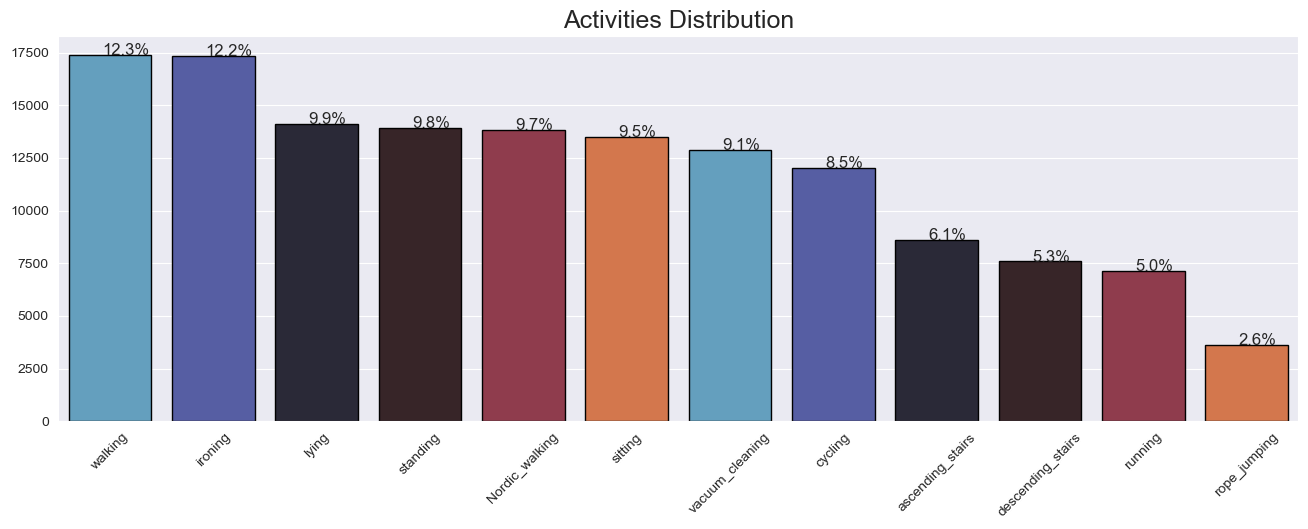

In [30]:
#To check for the distribution of the activities in the EDA dataset
plot_percentage(eda_data.activity, "Activities Distribution")

Total unique values are:  9 


Category	Value

105    19776
102    19279
108    19235
101    18311
106    18178
104    17007
107    17002
103    12668
109      470
Name: id, dtype: int64


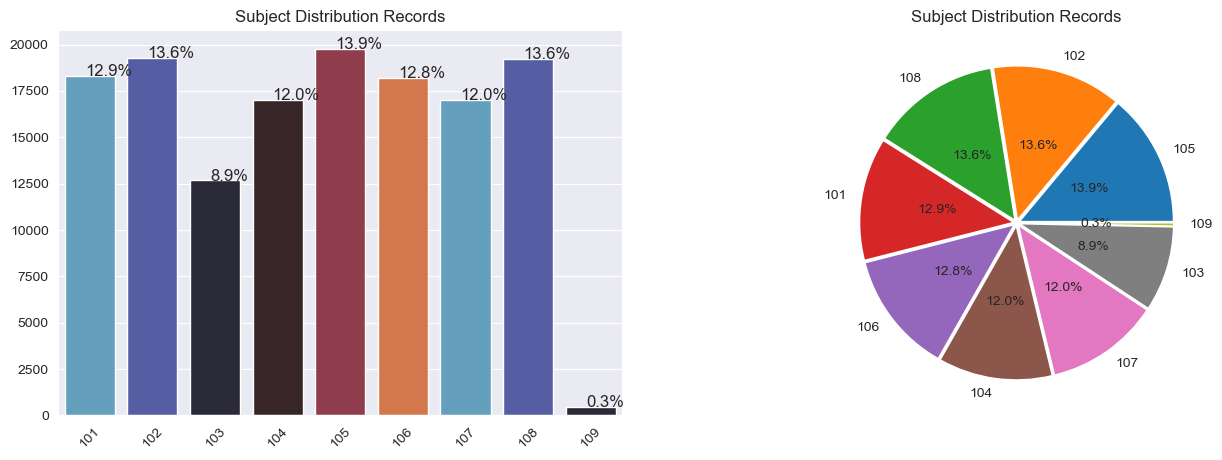

In [31]:
#Distribution of Records among all subjects
plot_graph(eda_data.id, "Subject Distribution Records")


From the plots above, it shows that the distribution is not evenly distributed and this resulted in an imbalance in the distribution. The following suggestions could be the reason for this.

   1. Subject 109 seems to be lacking enough data record compared to the other 8 subjects as seen in the Subject distribution record plot.
   
   2. The rope jumping activity seems to have a low amount of recorded data in comparison with other activities as shown in the Activities Distribution plot.
   
These two reason can be assumed as the reason for the uneven distribution / imbalance in the dataset.


## 4.2. Subject Distribution


In this section, I focused on the distribution of the 9 subjects using the mean across the various variables. The first step was to group the subject id by the mean across the various features. Moving forward, an analysis of the different subjects performance of the Time stamp, Heart rate and three temperatures (i.e Hand temperature, Chest temperature and Ankle temperature) was carried out. This helped to give a better description and understanding of how each subject performed in this sectors as shown in the plots below.

In [32]:
# To calculate the mean of the Subjects
subject_mean = eda_data.groupby(by="id").mean()
subject_mean

time_stamp  activity_id  heart_rate  hand_temperature  \
id                                                            
101  1715.922684     8.328109  122.302059         32.423884   
102  2070.012206     8.453187  109.592873         32.332976   
103  1228.729166     7.926350   95.046416         31.887581   
104  1556.021037     7.531546  109.357853         31.909696   
105  1823.812013     8.051325  108.474464         34.768169   
106  1723.228376     7.799923  103.068764         32.289608   
107  1537.413257     7.846195   96.339431         32.949067   
108  1823.692598     8.153210  109.839771         33.159516   
109    63.871489    24.000000  148.755319         25.054920   

     hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
id                                                          
101                  -4.162540                   5.828070   
102                  -5.196909                   4.823385   
103                  -4.514354                   4.384370   
104                  -5.988678                   3.367341   
105                  -4.297075                   5.584529   
106                  -5.058229                   4.864144   
107                  -5.410292                   4.369995   
108                  -5.294712                  -4.314192   
109                  -0.481343                   8.626764   

     hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
id                                                         
101                   3.730374                 -4.131284   
102                   3.016141                 -5.150591   
103                   3.641904                 -4.491217   
104                   4.277317                 -5.930757   
105                   3.603718                 -4.160058   
106                   3.518525                 -5.025711   
107                   3.860817                 -5.337667   
108                   3.369631                 -5.222838   
109                  -1.174262                 -0.588781   

     hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  ...  \
id                                                       ...   
101                  5.859297                  3.882215  ...   
102                  4.849244                  3.167462  ...   
103                  4.394505                  3.767010  ...   
104                  3.384338                  4.427687  ...   
105                  5.583526                  3.849451  ...   
106                  4.712816                  3.769180  ...   
107                  4.344509                  4.025472  ...   
108                 -4.309010                  3.592623  ...   
109                  8.819496                 -1.261413  ...   

     ankle_3D_gyroscope_x  ankle_3D_gyroscope_y  ankle_3D_gyroscope_z  \
id                                                                      
101              0.000806              0.007542              0.025880   
102             -0.037865             -0.054216             -0.007496   
103             -0.004430             -0.036342              0.024069   
104              0.019663             -0.052286              0.011258   
105              0.013084             -0.038849              0.032994   
106              0.017913             -0.040691              0.018675   
107              0.026009             -0.054739              0.003689   
108              0.056517             -0.013164              0.015578   
109              0.024788             -0.037303             -0.082178   

     ankle_3D_magnetometer_x  ankle_3D_magnetometer_y  \
id                                                      
101               -49.560126                -3.748856   
102               -28.799458                 1.305060   
103               -24.783524                 4.008936   
104               -27.846135                -2.931328   
105               -31.967921                 2.663706   
106               -30.475277                 1.433942   
107           

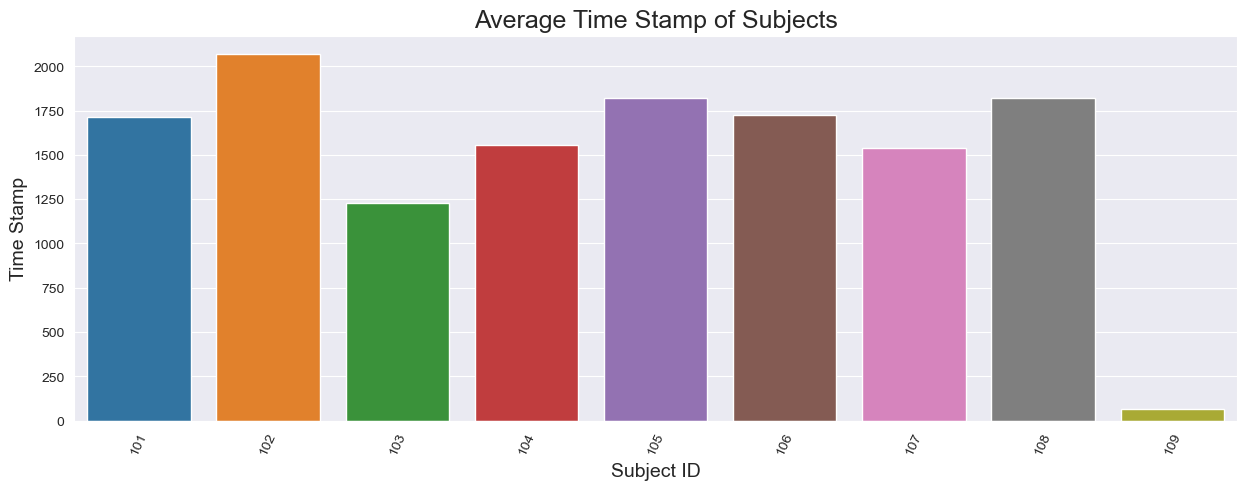

In [33]:
# To find the Average time stamp
x = subject_mean["time_stamp"]
plot_barchart(x.index, x.values, "Average Time Stamp of Subjects", "Subject ID", "Time Stamp")

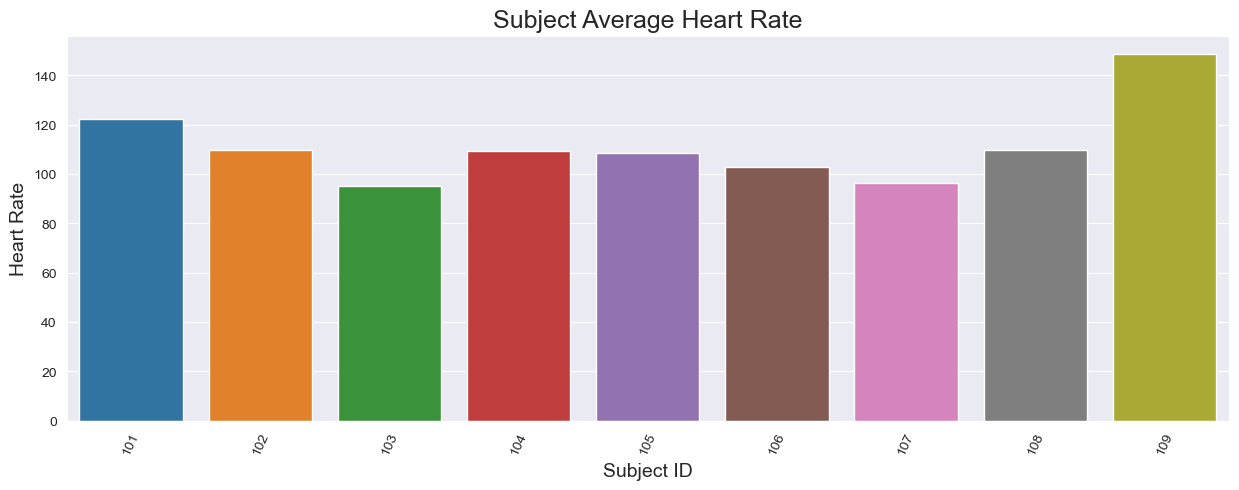

In [34]:
# Average Heart Rate
x = subject_mean["heart_rate"]
plot_barchart(x.index, x.values, "Subject Average Heart Rate", "Subject ID", "Heart Rate")

#it can be noticed that the average heart rate is almost the same among all subjects.

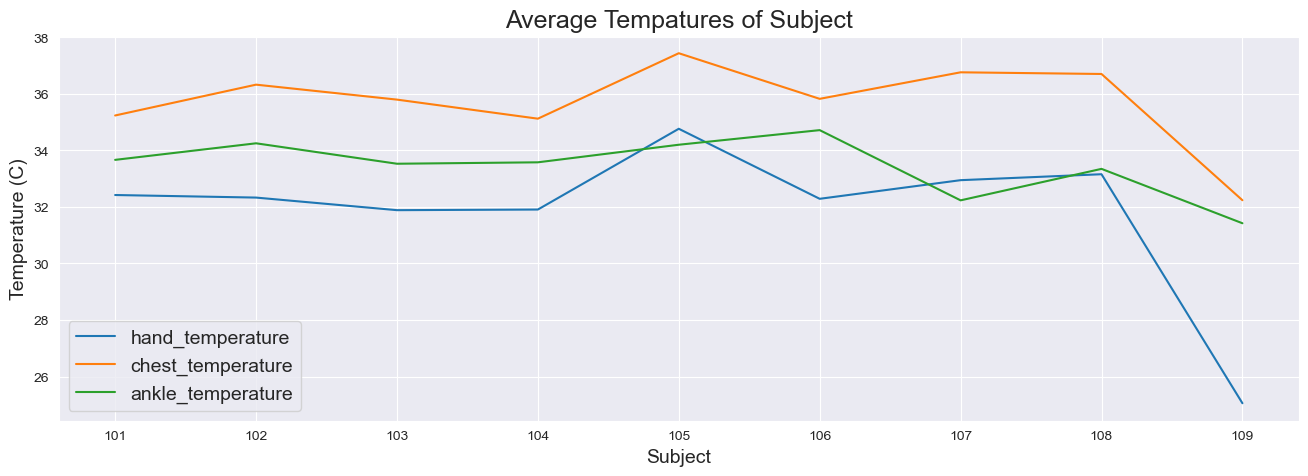

In [35]:
# Average temperature of each subject
def plot_linechart(data=subject_mean, mode=""):
    x = data[["hand_temperature", "chest_temperature", "ankle_temperature"]]
    plot = x.plot(kind="line", figsize=(16,5))
    plt.title(f"Average Tempatures of {mode}", fontsize = 18)
    plt.xlabel(mode, fontsize = 14)
    plt.ylabel("Temperature (C)", fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()
    
plot_linechart(mode="Subject")

## 4.3 Activity Distribution

In this section, I focused on the distribution of the activities using the mean value. Firstly, I grouped the activities by the mean and proceeded to carry out an analysis of the activities performance across different functions. This included the Time stamp for each activity, Heart rate for each activity and the temperatures (Hand temperature, Chest temperature and Ankle temperature) of the various activities. This helped to provide an indepth understanding of the various activities and would be useful in our hypothesis testing and modelling. The plots below shows the activity distribution.

In [36]:
# To find the average activity summary
average_activity= eda_data.groupby("activity").mean()
average_activity

time_stamp  activity_id  heart_rate  hand_temperature  \
activity                                                                    
Nordic_walking     2905.772210          7.0  123.816616         31.527517   
ascending_stairs   1808.024297         12.0  129.746890         33.527744   
cycling            3128.516791          6.0  124.819406         31.007691   
descending_stairs  1906.726765         13.0  129.177587         33.322322   
ironing            1025.661551         17.0   90.089299         34.017351   
lying               205.850482          1.0   75.531310         32.732067   
rope_jumping       3348.270838         24.0  162.039989         29.733384   
running            3444.092422          5.0  156.503295         30.815160   
sitting             506.510255          2.0   80.033918         33.266162   
standing            732.981550          3.0   88.511740         33.638916   
vacuum_cleaning    1359.700843         16.0  104.197529         34.177418   
walking            2429.260349          4.0  112.802390         32.294685   

                   hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
activity                                                                  
Nordic_walking                     -4.716512                   5.055905   
ascending_stairs                   -8.732363                   3.650176   
cycling                            -5.166896                   2.465712   
descending_stairs                  -6.279365                   2.891707   
ironing                            -3.408890                   3.748494   
lying                               3.658921                   2.059825   
rope_jumping                       -4.124675                   5.407377   
running                            -6.835006                   6.717005   
sitting                            -1.375632                   4.289179   
standing                           -7.084777                   3.220158   
vacuum_cleaning                    -7.165073                   3.582405   
walking                           -10.097894                   2.499748   

                   hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
activity                                                                 
Nordic_walking                      2.563937                 -4.733674   
ascending_stairs                    1.594569                 -8.639954   
cycling                             7.066421                 -5.194384   
descending_stairs                   3.642293                 -6.185561   
ironing                             5.455770                 -3.279883   
lying                               6.344051                  3.771544   
rope_jumping                       -0.510114                 -4.294065   
running                             0.216673                 -6.942850   
sitting                             5.185815                 -1.247589   
standing                            2.665077                 -6.949674   
vacuum_cleaning                     1.901790                 -7.046019   
walking                             1.917203                -10.092803   

                   hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  ...  \
activity                                                               ...   
Nordic_walking                     4.933197                  2.676555  ...   
ascending_stairs                   3.681606                  1.787508  ...   
cycling                            2.502832                  7.233331  ...   
descending_stairs                  2.908173                  3.844710  ...   
ironing                            3.745437                  5.673462  ...   
lying                              2.030594                  6.564260  ...   
rope_jumping                       5.445543                 -0.480821  ...   
running                            6.492068                  0.326286  ...   
sitting                            4.289881                  5.396450  ..

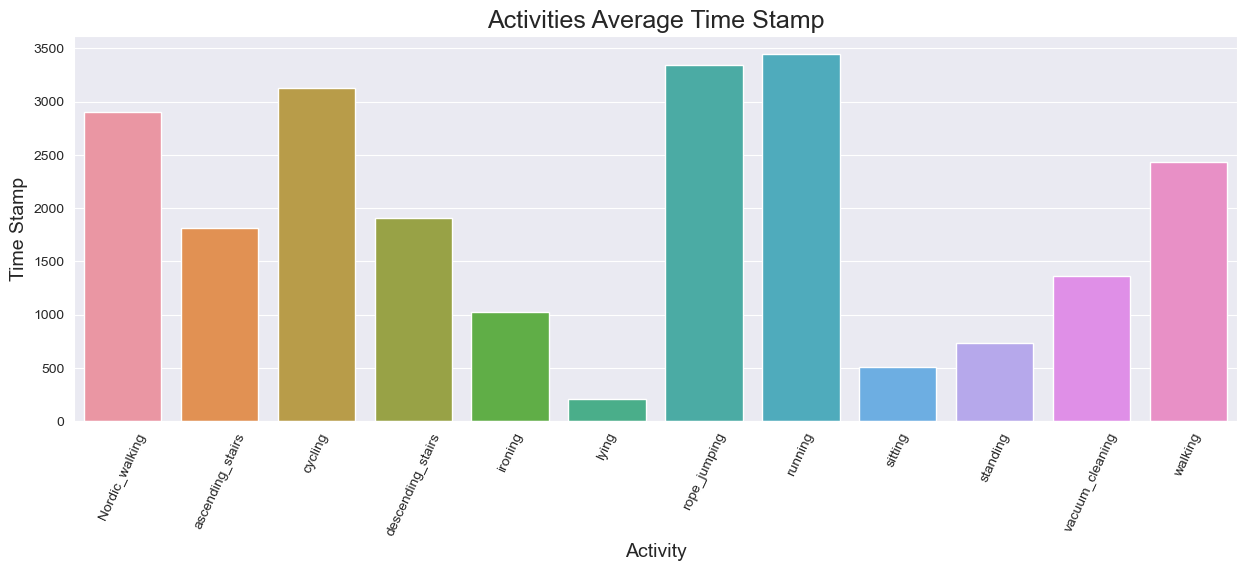

In [37]:
# Average time stamp of each activity
x = average_activity["time_stamp"]
plot_barchart(x.index, x.values, "Activities Average Time Stamp", "Activity", "Time Stamp")

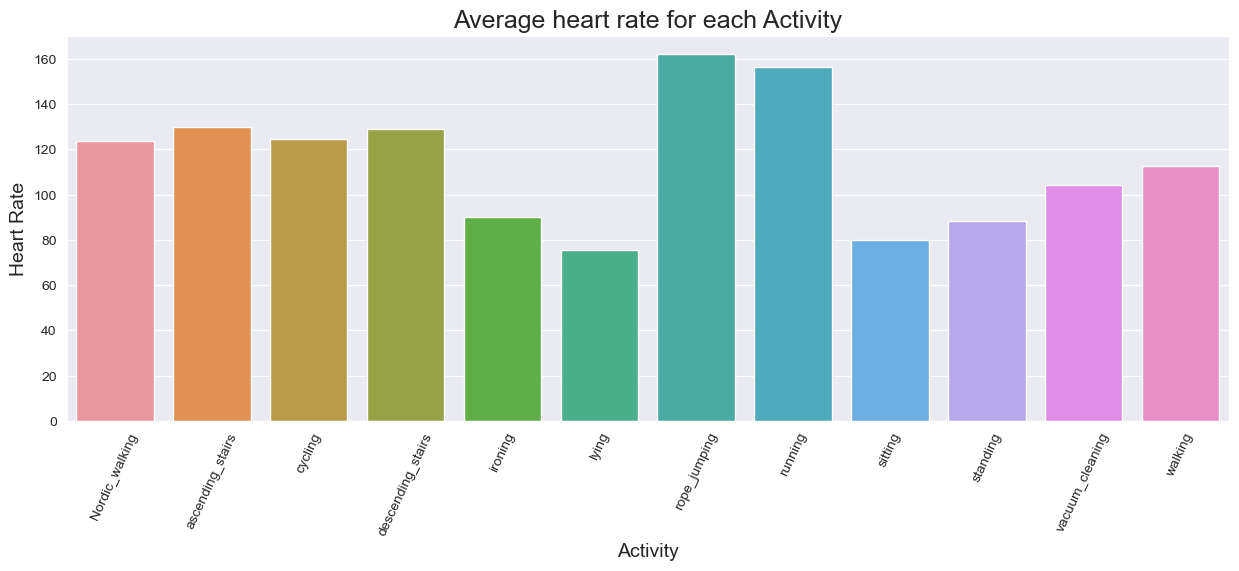

In [38]:
# Average heart rate for each activity
x = average_activity["heart_rate"]
plot_barchart(x.index, x.values, "Average heart rate for each Activity", "Activity", "Heart Rate")

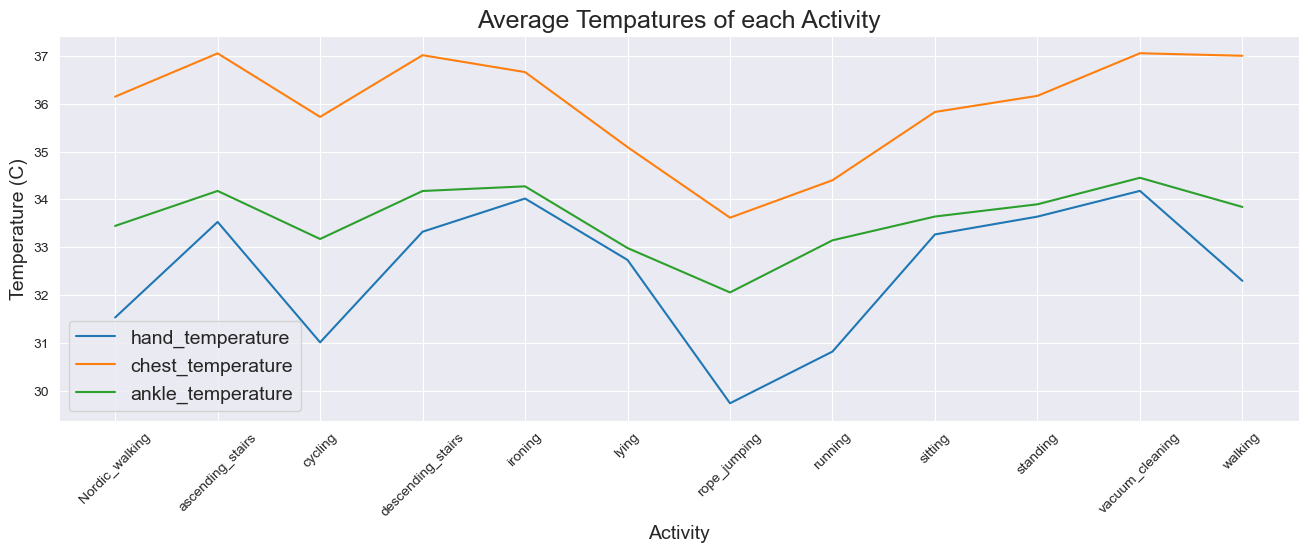

In [39]:
# To find the average temperature when carrying out each activity
x = average_activity[["hand_temperature", "chest_temperature", "ankle_temperature"]]

plt.figure(figsize=(16, 5))
sns.lineplot(x=x.index, y=x.hand_temperature, label="hand_temperature")
sns.lineplot(x=x.index, y=x.chest_temperature, label="chest_temperature")
sns.lineplot(x=x.index, y=x.ankle_temperature, label="ankle_temperature")
plt.title(f"Average Tempatures of each Activity", fontsize = 18)
plt.ylabel("Temperature (C)", fontsize = 14)
plt.xlabel("Activity", fontsize = 14)
plt.xticks(rotation=45)
plt.legend(fontsize=14)
plt.show()

### Exploratory Data Analysis Result

The various results were deduced from the analysis above.

1. Data Distribution
- The Ironing activity was the most recorded activity while the Rope jumping activity had the least record.
- Subject 105 had the highest record  while Subject 109 had the least record.
2. Subject Distribution
- Subject 102 had the highest time stamp while Subject 109 had the lowest time stamp.
- Subject 109 had the highest heart rate and Subject 103 had the lowest heart rate.
- The Subject with the highest recorded temperature was Subject 105 with a chest temperature of about 37.5 degree celsius while Subject 109  had the least recorded temperature with a hand temperature of about 12 degree celsius.
3. Activity Distribution
- The Running Activity had the highest time stamp and lying had the least time stamp.
- Rope jumping had the highest heart rate while lying had the lowest heart rate for obvious reasons.
- The chest temperature had the highest temperature across all activities amongst the three temperatures compared.
- The hand temperature had the lowest temperature across all activities amongst the three temperatures compared.
- Vacuum cleaning had the record of the highest temperature.

Further details can be extracted from the plot if desired.

# 5. Hypothesis Testing

Hypothesis Testing can be defined as the process of verifying the possiblity of an event to happen. This involves the procedure of deciding if the results from a reasearch supports the theory applied to a population. An assumption is usually made and based on the assumption made differnt methods  of hypothesis tests would be carried out to check if the claim or possibility is true based on the P values and Significance values set by the individual carrying out the test. 

The use of Scipy library is usually used to carry this test. For this report, I conducted two tests which are the **t-test** and the **z-test**. The tests carried out were based on the results gotten from the Exploratory Data Analysis (EDA) and the second half of the data splitted i.e the "hypo_data" would be used as the dataset for the testing.

Firstly, I defined a function that takes the p-value and significance value which was equal to 0.05 by default meaning that a 95% percent interval was written. Also, the function also carried out a comparison between the p-value and significance value and depending on the result the Null hypothesis was either rejected and the Alternative hypothesis accepted or vice versa. Therefore this  means that if the p-value is less than or equal to the significant value then the Null hypothesis would be rejected and the Alternative hypothesis would be accepted and if the p-value is greater than the significance level then the p-value would be of significance and the Null hypothesis would be accepted  and the alternative hypotheis would be rejected.Although the significance value could vary, for this analysis I used a significance value of 5% i.e  0.05 which will be used to determine if the null hypothesis would be accepted or rejected.

The second function defined was used to carryout the t-test. The t-test shows how significant the difference between two groups are. In other words, it tells us if the differences (measured in mean) could have occured by chance. For this report, the t-test  was performed twice to compare two different parameters. These are:

1. To check if the heart beat of two activities amongst the subjects are equal.
2. To check if the Hand temperature of two activities  amongst two subjects are equal.

The third function was defined to use to carryout a z-test. A z-test can be defined as a statistical test used to determine if two population means are different when the variances are known and the sample size is large. The z-statistics follows a normal distribution and it assumes that the Standard Deviation (S.D) is known unlike the t-test where it is assumed to be unkown. For this test,  to  check the mean of a subject among two activities a z-test was performed. The hypothesis statement was for this z-test was:

- To check if the heart beat of a single subject amongst two activities is equal.

In summary, the following tests were carried out for the hypothesis testing.

1. To check if the heart beat of two activities amongst the subjects are equal.  (t-test)
2. To check if the Hand temperature of two activities  amongst two subjects are equal. (t-test)
3. To check if the heart beat of a single subject amongst two activities is equal. (z-test)

This can be seen in the test carried out below together with  the result obtained.


In [40]:
# Defining a function to accept and reject hypothesis
def test_result(pvalue, h0, h1, sig_value=0.05):
    if pvalue <= sig_value:
        print(f"The Null Hypothesis is rejected with P_Value={pvalue} Therefore...\n{h1}")
    if pvalue > sig_value:
        print(f"The Null Hypothesis is accepted with P_Value={pvalue} Therefore...\n{h0}")

In [41]:
# Defining a function to carryout t test
def t_test(data1, data2, h0, h1, sig_value=0.05):
    stat, p_value = stats.ttest_ind(data1, data2, equal_var=True)
    test_result(p_value, h0, h1, sig_value)

In [42]:
# Defining a function to carryout a two sample Z test
def z_test(data1, data2, h0, h1, sig_value=0.05):
    from statsmodels.stats.weightstats import ztest as ztest
    stat, p_value = ztest(data1, data2, value=0)
    test_result(p_value, h0, h1, sig_value)

#### Test 1- To check if the heart beat of two activities amongst all subjects is equal or not.

In [43]:
# Carrying out the t-test
heart_rate = hypo_data.query("activity == 'rope_jumping'")["heart_rate"]
running = hypo_data.query("activity == 'running'")["heart_rate"]

h0 = "The Average Heart Rate of Running and Rope Jummping activity is equal"
h1 = "The Average Heart Rate of Running and Rope Jummping activity is not equal"

t_test(heart_rate, running, h0, h1, 0.05)

The Null Hypothesis is rejected with P_Value=2.5035043445307655e-07 Therefore...
The Average Heart Rate of Running and Rope Jummping activity is not equal


#### Test 2- To Check if the Hand temperature of two subjects amongst all activites is equal or not.

In [44]:
# Carrying out the t-test
sub_103 = hypo_data.query("id == 103")["hand_temperature"]
sub_109 = hypo_data.query("id == 109")["hand_temperature"]

h0 = "The Average Hand Temperature of Subject 103 and 109 is equal"
h1 = "The Average Hand Temperature of Subject 103 and 109 is not equal"

t_test(sub_103, sub_109, h0, h1, 0.05)

The Null Hypothesis is rejected with P_Value=0.0 Therefore...
The Average Hand Temperature of Subject 103 and 109 is not equal


The result from the two t-tests carried out above shows that the Average Heart rate and Hand temperature of two subjects or activities cannot be the same.

#### Test 3- To check if the Heart beat of a single object amongst two activities is equal or not.

In [45]:
# Carrying out a Z-test
running_act = hypo_data[(hypo_data.id == 105) & (hypo_data.activity == "running")].iloc[0:200, 2].values
lying_act = hypo_data[(hypo_data.id == 105) & (hypo_data.activity == "lying")].iloc[0:200, 2].values

h0 = "The Heart Beat of Subject 105 in activity Running and Lying is equal"
h1 = "The Heart Beat of Subject 105 in activity Running and Lying is not equal"

z_test(running_act, lying_act, h0, h1, 0.05)

The Null Hypothesis is rejected with P_Value=0.0 Therefore...
The Heart Beat of Subject 105 in activity Running and Lying is not equal


## Hypothesis Testing Result

From the hypothesis test carried out the following information was concluded:

After carrying out the hypothesis tests above, the following results were deduced.

- Test 1: The first t-test carried out had a p-value of $2.5*{10^-7}$ which means that the p-values is less than the significance values of 0.05. Therefore, the null hypothesis (h0) stated will be rejected and the alternative hypothesis (h1) would be accepted.

- Test 2: The second t-test carried out had p-value of 0.0 (zero) which is less than the significance value. Therefore,  the Null  hypothesis (h0) would be rejected and the alternative hypothesis (h1) would be accepted.

- Test 3: Here I carried out a z-test. The p-value gotten was also 0.0 (zero) which is less than the significance value of 0.05, therefore, the Null hypothesis (h0) was rejected and the alternative hypothesis (h1) accepted.

In conclusion, for the 3 tests carried out for the hypothesis testing, the Null hypothesis (h0) was rejected and the alternative hypothesis (h1) was accepted. This result gotten matches the result gotten from the Exploratory Data Analysis (EDA) performed and it means that:
 - For Test 1: The Average Heart Rate of Running and Rope Jummping activity is not equal
 - For Test 2: The Average Hand Temperature of Subject 103 and 109 is not equal
 - For Test 3: The Heart Beat of Subject 105 in activity Running and Lying is not equal


# 6. Machine Learning Models

For this report, the Modelling was the final part performed on the data. For this section, I made use of the copy of my dataset stored as "df2" to carryout the test. Before proceeding to feed the data to the model, the process of picking the right model to train the data was paramount and carried out first. There are a lot of factors that are needed to  be taken into consideration such as the complexity of the model to be used, the size of the data, the desired output of the model,  the type of problem (i.e if it is a classification or regression problem, and  many other factors that should be considered. 

For this analysis, the aim of carrying out the Exploratory Data Analysis (EDA) was to  get a better understanding of the data before proceeding to use a model  that would fit the data best. In this case, the activities performed by the user will be predicted based on  other features in the dataset such as the heart beat, hand temperature and several other features. The goal was for the model to predict the type of activity being performed by an  individual based on the other data features. Therefore, we can say that the problem here was a Classification problem.

The initial step carried out was to separate the data  into independent and dependent variables. Next I proceeded to convert all  the strings to  floats and fill  the NaN values with zero to enable the model run smoothly without any value errors. The data was also separated into train data and test data with a 70:30 ratio respectively. The "activity_id" was taken as the dependent variable since the model needed to  predict it based on the other variables in the dataset. Therefore, all the other remaining variables were taken as the independent variables.  For the train and test data splitting, I used sklearn library function.

I also performed a model evaluation where i defined a function called assess which took the following parameters: model, training and test data. The function was also used to calculate the training and testing score of the model, confusion matrix and plot a heatmap using seaborn library.


## Data Splitting for modelling

In [46]:
# Separating data into dependent and independent variables
parameter_ = df2.drop("activity_id", axis=1) #independant variables
target_ = df2['activity_id'] #dependent

In [47]:
# converting all strings to floats to avoid value errors
from sklearn.linear_model import LogisticRegression
parameter_ = parameter_.apply(pd.to_numeric,errors='coerce')
target_ = target_.apply(pd.to_numeric, errors='coerce')

parameter_.fillna(0,inplace=True)
target_.fillna(0,inplace=True)

In [48]:
# Spliting data into train and test data with the testing size as 30% and training size as 70% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(parameter_, target_, test_size=0.3, random_state=42)

In [49]:
# To check for the first 5 X_train data
X_train[:5]

time_stamp  heart_rate  hand_temperature  hand_3D_acceleration_16_x  \
8242       1035.94        99.0           33.3125                  -0.085924   
65759       447.32        80.0           32.9375                  -2.557240   
140930     1220.93       102.0           34.1250                  -6.411270   
136115      621.67        71.0           32.9375                  -9.042070   
175226     3541.08       176.0           30.8750                 -10.569700   

        hand_3D_acceleration_16_y  hand_3D_acceleration_16_z  \
8242                      4.03791                    8.72333   
65759                     5.15141                    8.02827   
140930                    4.32735                    1.62290   
136115                    3.36673                    2.20254   
175226                    1.86804                   -1.24067   

        hand_3D_acceleration_6_x  hand_3D_acceleration_6_y  \
8242                    0.020636                   4.97777   
65759                  -2.435860                   5.20673   
140930                 -6.767110                   3.70668   
136115                 -8.962410                   3.48168   
175226                -10.902400                   1.03004   

        hand_3D_acceleration_6_z  hand_3D_gyroscope_x  ...  \
8242                     8.10706            -1.421650  ...   
65759                    7.89766             0.055935  ...   
140930                   1.48755             0.818223  ...   
136115                   2.33593             0.066045  ...   
175226                  -1.91513            -0.503380  ...   

        ankle_3D_gyroscope_z  ankle_3D_magnetometer_x  \
8242               -0.002876                -46.70650   
65759              -0.012598                 -2.68690   
140930             -0.027759                -63.94080   
136115              0.017543                 -2.40741   
175226             -0.879200                -25.58900   

        ankle_3D_magnetometer_y  ankle_3D_magnetometer_z  \
8242                   -8.42546                 56.31130   
65759                  -5.22889                 23.53070   
140930                  7.83771                 13.08820   
136115                 -4.52816                  3.95804   
175226                 38.22670                  8.64919   

        ankle_4D_orientation_x  ankle_4D_orientation_y  \
8242                  1.000000                0.000000   
65759                 0.225365               -0.683088   
140930                0.548601                0.101087   
136115                0.243056               -0.694247   
175226                0.505209                0.522668   

        ankle_4D_orientation_z  ankle_4D_orientation_w   id  activity  
8242                  0.000000                0.000000  101       0.0  
65759                -0.118875               -0.684449  104       0.0  
140930                0.829719                0.019604  107       0.0  
136115                0.375359               -0.563960  107       0.0  
175226                0.686031                0.030719  108       0.0  

[5 rows x 55 columns]

In [50]:
# To check for the first 5 y_train data
y_train[:5]

8242      17
65759      2
140930    16
136115     3
175226     5
Name: activity_id, dtype: int64

## 6.1 Model 1- Logistic Regression

Logistic model is a supervised model used to model the probability of a certain class or event existing e,g Win or lose, dead or alive, sick or healthy, pass or fail etc. This can be extended to model several classes of events such as determining whether an image contains a dog, mouse, cat etc. Each object being detected in the image would be assigned a probability between 0 and 1 with a total sum of 1.

Logistic regression is used in various fields including machine learning and  majorly in the medical and social science fields. For example,  the Trauma and Injury Severity Score (TRISS) which is used to predict mortality in injured patients was developed using logistic regression. Several other medical scales used to assess severity of patients were also developed using logistic regression.

In order to  carry out the logistic regression model a hyperparameter tuning would be carried out first.

### Hyperparameter Tuning

Hyperparameter Tuning involves tuning the parameters of a machine learning  model before proceeding to feed the data to the model. This can be considered as an important step  to  perform because the optimal values of these parameters give different values depending on various factors in the data. For this report, different hyperparameter combinations were checked and the combination that gave the best evaluation result was used.

Hyperparameters are important as they control the overall behaviour of a machine learning model. The goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.

Two techniques used for parameter tuning are:

1. **GridSearchCV**
      
      This is one of the simplest algorithm for hyperparameter and it basically tries to check the model for all possible parameter combination. Although it is a very slow technique as it works in a brute force way to check for every possible combination. Due to the size of the data, the hyperparameter tuning might take a long time depending on the computational power being used.
      
2. **RandomSearchCV**
      
      This performs very similar to the GridSearchCV however,it randomly selects specific numbers of combinations of the parameters on which it trains the model and tries to find the best parameters. Although it is faster than the GridSearchCV, it's disadvantage is because it selects specific commbinations randomly so there is a possibility that it may leave out the best combination. However, it is very fast and the user has control on the number of fittings.
      
For this analysis, the GridSearchCV was used to find the best parameters. The following parameters were used.

- **Estimator**:
    
    The estimator parameter accepts the machine learning model parameter to be tuned by the user.
    
- **Param_distributions**:
    
    The param_distribution is a dictionary that contains the model parameters with multiple values. The RandomSearchCV uses it to find the best parameter values.
    
- **n_jobs**:
    
    Its default value is -1  and this parameter indicates how many threads is required to make for the process. -1 means that the maximum number of threads will be used to get results in less time.

For this modelling, the following parameters were tuned.

- Penalty
- C
- max_iter

From the result gotten, the best values obtained was C=2, max_iter=200 and penaltyy=l2. 

Using these parameters, the model was trained and evaluated with the function that was built and the model performed well with a training accuracy of 0.835 and a testing accuracy of approximately 0.838.

In [51]:
# Defining a function to evaluate the model
def assess(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    from sklearn import metrics
    from sklearn.metrics import classification_report    
    # To make predictions from model
    y_predict = model.predict(X_test)
    
    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_test, y_predict)
    
    # printing all results
    print(f"The Training Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Testing Accuracy of the Model is {model.score(X_test, y_test)}")
    print(f"The Model classification report is {classification_report(y_test,y_predict)}")
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

In [ ]:
#Note: This cell might take up to 90 minutes to run depending on the available computational power.
#finding the best params combination to use with logistic regression 
#from sklearn.model_selection import GridSearchCV

#params = {
    "penalty": ["l1", "l2"],
    "C": [1,2],
    "max_iter": [100, 200],
    "solver": ["liblinear","lbfgs"]
}

#grid = GridSearchCV(LogisticRegression(), params, n_jobs=-1)
#grid.fit(X_train, y_train)
#grid.best_params_

#from this cell it can be seen that those parameters are the best parameters to use in the logistic regression model usig GridSearch.
     

**Please note that the above cell took a long time to re-run on  my system due to the computational  power however, i ran it previously and got {'C': 2, 'max_iter': 200, 'penalty': 'l2'} as the result hence why i proceeded to use this parameters to train the model.**

In [52]:
# To feed the training data to the model.
model = LogisticRegression(C=2, max_iter=200, penalty="l2")
model.fit(X_train, y_train)
     

LogisticRegression(C=2, max_iter=200)

The Training Accuracy of the Model is 0.8350283850706607
The Testing Accuracy of the Model is 0.8376641677470267
The Model classification report is               precision    recall  f1-score   support

           1       0.95      0.98      0.97      5311
           2       0.94      0.94      0.94      4979
           3       0.91      0.88      0.89      5196
           4       0.76      0.86      0.81      6538
           5       0.75      0.68      0.71      2651
           6       0.83      0.95      0.89      4494
           7       0.70      0.75      0.72      5194
          12       0.71      0.64      0.67      3246
          13       0.73      0.49      0.59      2904
          16       0.90      0.93      0.92      4813
          17       0.91      0.95      0.93      6537
          24       0.59      0.31      0.40      1360

    accuracy                           0.84     53223
   macro avg       0.81      0.78      0.79     53223
weighted avg       0.83      0.84      0

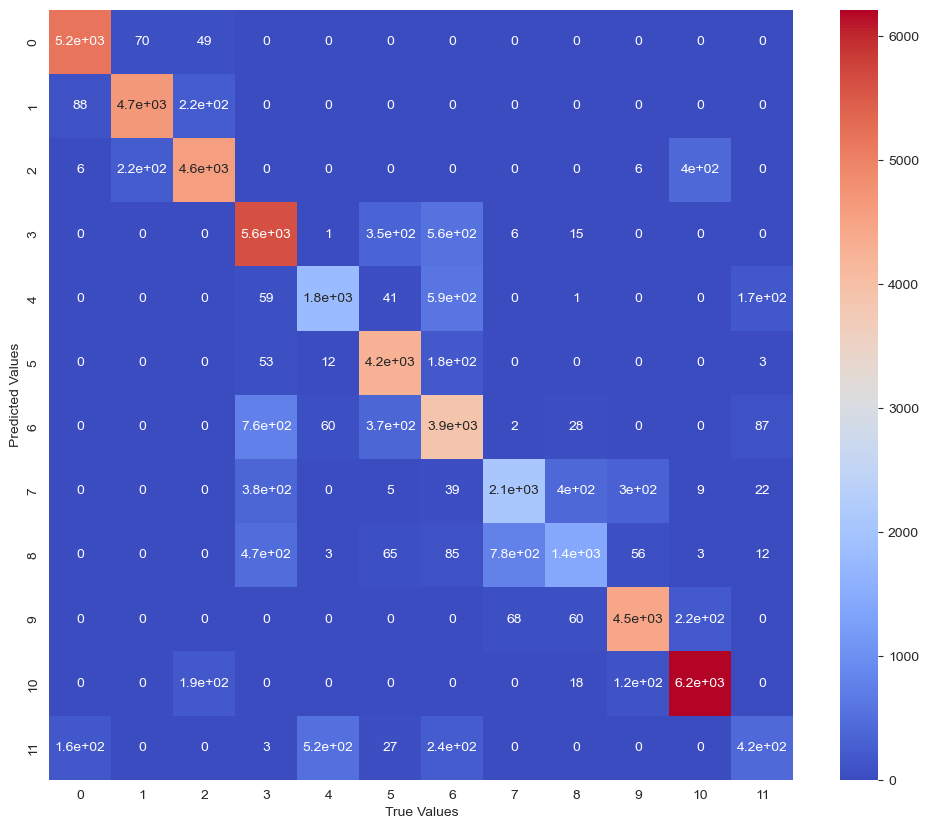

In [54]:
assess(model)

### Result

The following results were deduced from the Logistic regression model.

1. The heatplot shows that the model performed realy well for almost all the classes except class 11, 8, 7 and 4. This could have occured as a result of the data imbalance causing it to lag behind.

2. The classification report shows that the model had a weighted average of 1.00 for both precision and recall which  is good.

## 6.2 Model 2- K-Means Clustering

K-Means Clustering can be described as an unsupervised machine learning model. K-means  is a centroid-based algorithm or a distance-based algorithm which calculates the distances to  assign  a point to a cluster. In K-means, each  cluster is associated with a centroid. The major objective of the K-Means algorithm  is to reduce the sum of the distances between the points and their respective cluster centroid. Therefore, the closer the distance between the clusters, the better the result.

A partitional  clustering model  named  K Means Clusters was built here. However, before building the model, the ELBOW method was used to get the optimal number of clusters. To achieve that an iteration throughout a list of number from 1 to 7 was carried out and for each number the model was trained and the Sum of Squared Distances (SSD) was gotten. Ideally,the SSD should be as minimal as  possible in  order  to obtain a good result. Furthermore, the SSD scores were stored in an array for each number of cluster and the result was plotted using matplotlib.  The ELBOW method shows that the selected number of clusters at which the SSD graph is plotted is making an Elbow shape. From the plot, we can see the elbow happening at point 2 therefore, K=2 was selected as the best value for the number of clusters to be  applied on the dataset. The final  model was also made using 2 clusters. 

Although the silhouette score was supposed to be calculated unfortunately the running time was too long to produce an output.


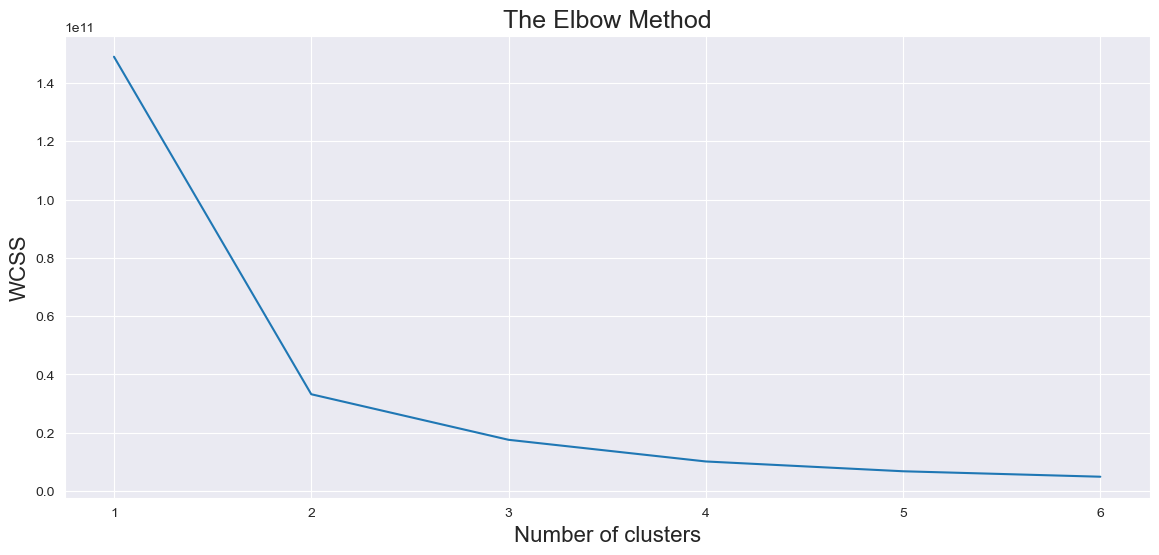

In [55]:
#note:this cell might take up to 5 minutes to run
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score 

ss=[]
ars=[]
wcss=[]
number_clusters = range(1,7)

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X_train)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
#     calculate silhouette and adjusted rand each time
#     ss.append(silhouette_score(X_train, kmeans.predict(X_train))) 

# print("90% confidence interval for silhouette score: [{},{}]".format(np.percentile(ss,5),np.percentile(ss,95)))
plt.figure(figsize=(14, 6))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method', fontsize=18)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.show()

In [56]:
#Training the model 
model = KMeans(2)
model.fit(X_train)

KMeans(n_clusters=2)

In [57]:
# Model Performance
model.inertia_

33216169451.06401

### Result

There are two ways to evaluate the performance of the algorithm in K-means. The first method is with the Silhouette score and the second  method is with inertia. 

Inertia can be described as a measure of hoe well the dataset was clustered in k-means. It measures the distance of each point from its centroid, squaring the distance and summing the square across each cluster. To identify a good model, it should have a low inertia and a low number of clusters. However, as K increases, the inertai decreases therefore this is where the elbow method comes in to give the best number of clusters to use on the data and for this case the best performance for the model was k=2 which gave an inertia of 33216169451.06401. 



## 6.3 Model 3- Random Forest Classifier

Random Forest Classifier can be described as a more advanced supervised machine learning algorithm. Considering that the desired output for the dataset is a classification problem, the use of a random forest classifier is a good practice. The model is made using a multitude of decision trees which serve as the building blocks of the model. It uses an ensemble method meaning that it collects the output class from each tree and the class with the most votes is selected as the model's prediction.

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

The Training Accuracy of the Model is 1.0
The Testing Accuracy of the Model is 0.9991920786126299
The Model classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      5311
           2       1.00      1.00      1.00      4979
           3       1.00      1.00      1.00      5196
           4       1.00      1.00      1.00      6538
           5       1.00      1.00      1.00      2651
           6       1.00      1.00      1.00      4494
           7       1.00      1.00      1.00      5194
          12       1.00      1.00      1.00      3246
          13       1.00      0.99      1.00      2904
          16       1.00      1.00      1.00      4813
          17       1.00      1.00      1.00      6537
          24       1.00      1.00      1.00      1360

    accuracy                           1.00     53223
   macro avg       1.00      1.00      1.00     53223
weighted avg       1.00      1.00      1.00     53223



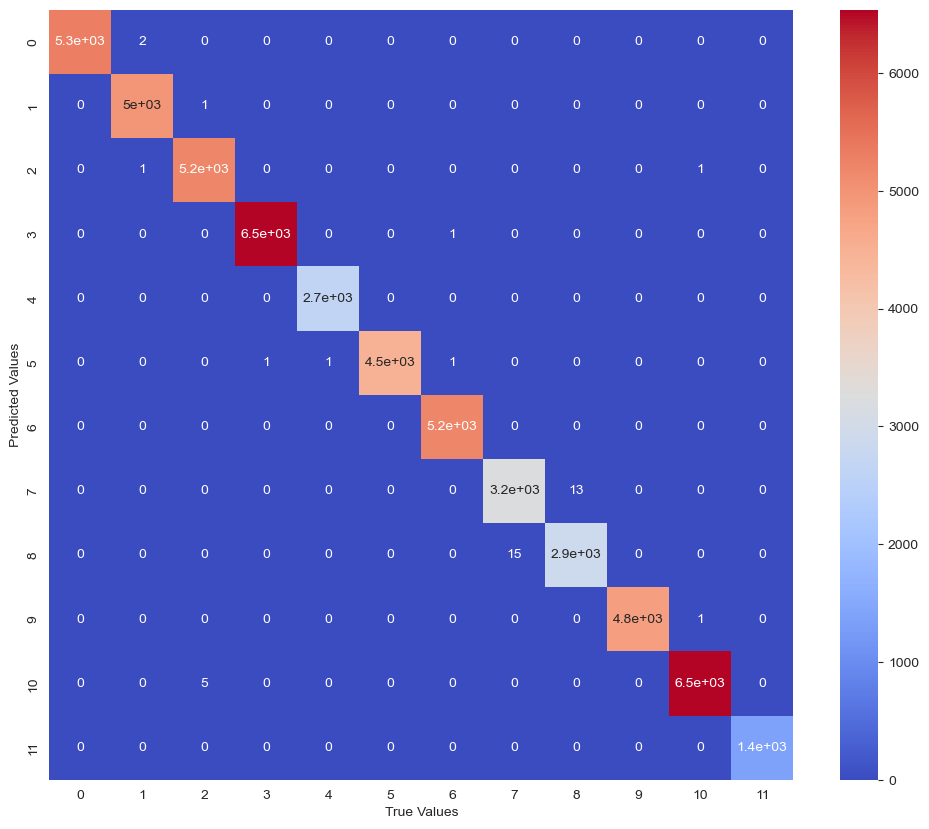

In [59]:
#evalutating the model performance
assess(model)

### Result

The result from the Random Forest Classifier above shows that the model also performs really good on the dataset with 100% accuracy on the training set and 99.9% on the test set. The weighted average of both the precision and recall was gotten as 1.

The model parameters were kept to default with the number of trees as 100 in the forest which might take time to run on the dataset depending on the computational power used however, the results obtained would be good as shown above. As previously mentioned, the hierarchical classification model which is more complex and the model output is based on the votes from the 100 trees in its underlying structure which yields a good evaluation metrics.

# 7. Conclusion

In conclusion, after carrying out a thorough Data Cleaning, Exploratory Data Analysis, Hypothesis Testing and Modelling with 3 different classification models on the dataset, the result gotten shows that a software can be made to predict the type of activity being carried out by an individual depending on so many factors present in the dataset variables. Although the Random Forest Classifier gave the best result, however the K-Means Clustering and Logistic regression also produced very good results.  

The health and fitness industry has become a profitable industry and the importance of staying healthy and fit has become very paramount for basically almost everybody. Therefore, developing a software or application to help people know which activities would help them achieve their fitness goal be very benefitting to both the company and customers.

Please note that the data used for this report was collected from only 9 people however, a wider research could be conducted for more accurate predictions using more people from different backgrounds and ethnicities.


In [66]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 600

import io
from nbformat import current

filepath="DSRM Report 2.ipynb"
question_count=600

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 4055


# 8. References

1. wikipedia.org/wiki/Exploratory_data_analysis
2. https://latrobe.libguides.com/maths/hypothesis-testing
3. https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148 (logistic regression)
4. https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/ (hyperparameter tuning)
5. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (logistic regression)
6. https://asperbrothers.com/blog/logistic-regression-in-python/(evaluating logistic regression model) (evaluating logistic regression)
7. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
8. https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f (K-means)
9. https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a (K-means)
10. https://towardsdatascience.com/understanding-random-forest-58381e0602d2 (random forest)
11. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (Random forest)
12. DSRM lecture slides and labs (The random forest classifier was taken into consideration from the Guest lecture)
